<a href="https://colab.research.google.com/github/biswajitburagohain/neural_net-practice/blob/master/NLP_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
import numpy as np

In [0]:
dataset ="Apne karam ki kar adaayein \nYaara \nMujhko iraade de kasamein de waade de \nMeri duaaon ke ishaaron ko sahaare de \nDil ko thikaane de naye bahaane de \nKhwaabon ki baarishon ko mausam ke paimane de \nApne karam ki kar adaayein \nKar de idhar bhi tu nigaahein \nSun raha hai naa tu ro raha hun main \nSun raha hai naa tu kyun ro raha hun main \nManzilein ruswa hain khoya hai raasta \nAaye le jaaye itni si iltejaa \nYe meri zamanat hai tu meri amaanat hai haan \nApne karam ki kar adayein \nKar de idhar bhi tu nigaahein \nSun raha hai naa tu ro raha hoon main \nSun raha hai naa tu kyun ro raha hun main \nWaqt bhi thehara hai kaise kyun ye huaa \nKaash tu aise aaye jaise koi duaa \nTu rooh ki raahat hai tu meri ibaadat hai \nApne karam ki kar adaayein \nKar de idhar bhi tu nigaahein \nSun raha hai naa tu ro raha hun main \nSun raha hai naa tu kyun ro raha hun main"

In [0]:
corpus = dataset.lower().split('\n')

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

In [0]:
total_word = len(tokenizer.word_counts) +1

In [0]:
input_sequence = []
for line in corpus:
  token_words = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_words)):
    n_gram_sequence = token_words[:i+1]
    input_sequence.append(n_gram_sequence)

In [101]:
input_sequence[1:3]

[[12, 13, 6], [12, 13, 6, 5]]

In [0]:
max_length = max([len(x) for x in input_sequence])

In [103]:
max_length

10

In [0]:
padding = pad_sequences(input_sequence, maxlen=max_length, padding='pre')

In [0]:
input_sequence = np.array(padding)

In [106]:
input_sequence

array([[ 0,  0,  0, ...,  0, 12, 13],
       [ 0,  0,  0, ..., 12, 13,  6],
       [ 0,  0,  0, ..., 13,  6,  5],
       ...,
       [ 0,  0,  7, ..., 16,  9,  2],
       [ 0,  7,  2, ...,  9,  2, 11],
       [ 7,  2,  3, ...,  2, 11, 10]], dtype=int32)

In [0]:
train_x, label = input_sequence[:, :-1], input_sequence[:,-1]

In [0]:
train_y = tf.keras.utils.to_categorical(label, num_classes=total_word)

In [109]:
print(input_sequence[0])
print(train_x[0])
print(label[0])
print(train_y[0])

[ 0  0  0  0  0  0  0  0 12 13]
[ 0  0  0  0  0  0  0  0 12]
13
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(total_word, 100, input_length=max_length-1),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
                             tf.keras.layers.Dense(total_word, activation='softmax')])

In [0]:
adam=Adam(0.01)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [121]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 9, 100)            6700      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_2 (Dense)              (None, 67)                20167     
Total params: 328,067
Trainable params: 328,067
Non-trainable params: 0
_________________________________________________________________


In [122]:
history = model.fit(train_x, train_y, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 27ms/step - loss: 4.1370 - accuracy: 0.0548
Epoch 2/200
5/5 [==============================] - 0s 27ms/step - loss: 3.5613 - accuracy: 0.1164
Epoch 3/200
5/5 [==============================] - 0s 25ms/step - loss: 3.0766 - accuracy: 0.1849
Epoch 4/200
5/5 [==============================] - 0s 23ms/step - loss: 2.6697 - accuracy: 0.2192
Epoch 5/200
5/5 [==============================] - 0s 25ms/step - loss: 2.2544 - accuracy: 0.3699
Epoch 6/200
5/5 [==============================] - 0s 25ms/step - loss: 1.7128 - accuracy: 0.4932
Epoch 7/200
5/5 [==============================] - 0s 23ms/step - loss: 1.2727 - accuracy: 0.6096
Epoch 8/200
5/5 [==============================] - 0s 24ms/step - loss: 1.0044 - accuracy: 0.6781
Epoch 9/200
5/5 [==============================] - 0s 29ms/step - loss: 0.8212 - accuracy: 0.6712
Epoch 10/200
5/5 [==============================] - 0s 30ms/step - loss: 0.5906 - accuracy: 0.8288
Epoch 11/200
5/5 [=

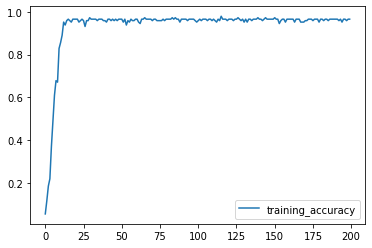

In [123]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
epo = range(len(acc))

plt.plot(epo, acc, label='training_accuracy')
plt.legend()
plt.show()

In [124]:
seed_text = "Meri duaaon ke ishaaron"
next_words=10

for _ in range(next_words):
  token_text = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_text], maxlen=max_length-1, padding='pre')
  predicted = model.predict_classes(token_list, verbose=0)
  output_word=""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)


Meri duaaon ke ishaaron ko sahaare de naye bahaane de waade de waade de
